# Regression

## Important notes

1. *When you open this file on GitHub, copy the address to this file from the address bar of your browser. Now you can go to [Google Colab](https://colab.research.google.com/), click `File -> Open notebook -> GitHub`, paste the copied URL and click the search button (the one with the magnifying glass to the right of the search input box). Your personal copy of this notebook will now open on Google Colab.*
2. *Do not delete or change variable names in the code cells below. You may add to each cell as many lines of code as you need, just make sure to assign your solution to the predefined variable(s) in the corresponding cell. Failing to do so will make the tests fail.*
3. *To save your work, click `File -> Save a copy on GitHub` and __make sure to manually select the correct repository from the dropdown list__.*
4. *If you mess up with this file and need to start from scratch, you can always find the original notebook [here](https://github.com/hse-mlwp-2022/assignment4-template/blob/main/regression_exercise.ipynb). Just open it in Google Colab (see note 1) and save to your repository (see note 3). Remember to backup your code elsewhere, since this action will overwrite your previous work.*

## Initialization

### Import the libraries you need in the cell below

In [ ]:
# Place your code here to import the libraries, e.g. pandas, numpy, sklearn, etc.
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

### 0. Find your task
Follow the [link](https://docs.google.com/spreadsheets/d/194gX8uSUyqv_aQbJi8_TYuIgXHsDBtMDCofQ1uJ4GvA/edit?usp=sharing) to a Google Sheet with a list of students. Locate your name on the list and take note of the corresponding Student ID in the first column. Fill it in the cell below and run the cell. If you can't find yourself on the list, consult your course instructor.

In [ ]:
### BEGIN YOUR CODE

Student_ID = 12

### END YOUR CODE

Now run the next cell. It will print all information for you.

In [ ]:
task_id = None if Student_ID is None else Student_ID % 5 if Student_ID % 5 > 0 else 5
_model_power = None if Student_ID is None else (Student_ID % 4) + 3
if task_id is not None:
    print(f"TASKID is {task_id}")
    print(f"Please, choose a dataset No {task_id} below")
    print(f"Your second model must be of power p = {_model_power}")
else:
    print("Please, enter your Student ID in the cell above!")

TASKID is 2
Please, choose a dataset No 2 below
Your second model must be of power p = 3


#### Datasets

1. Poultry meat consumption in Europe, kilograms per person per year

|     |     |     |     |     |     |     |     |     |     |     |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | 
| Year | 2000 | 2001 | 2002 | 2003 | 2004 | 2005 | 2006 | 2007 | 2008 | 2009 | 
| Consumption | 16.0 | 17.9 | 18.6 | 18.3 | 19.0 | 19.3 | 19.2 | 20.3 | 21.1 | 21.9 | 

2. Sugar consumption in Russia, grams per person per day

|     |     |     |     |     |     |     |     |     |     |     |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | 
| Decade | 1950 | 1960 | 1970 | 1980 | 1990 | 2000 | 2015 |
| Consumption | 32 | 85 | 115 | 130 | 130 | 96 | 107 |

3. Poultry meat consumption in Asia, kilograms per person per year

|     |     |     |     |     |     |     |     |     |     |     |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | 
| Year | 2000 | 2001 | 2002 | 2003 | 2004 | 2005 | 2006 | 2007 | 2008 | 2009 | 
| Consumption | 6.7 | 6.6 | 6.8 | 7.0 | 7.0 | 7.5 | 7.7 | 8.2 | 8.6 | 8.8 | 

4. Poultry meat consumption in Africa, kilograms per person per year

|     |     |     |     |     |     |     |     |     |     |     |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | 
| Year | 2000 | 2001 | 2002 | 2003 | 2004 | 2005 | 2006 | 2007 | 2008 | 2009 | 
| Consumption | 4.2 | 4.3 | 4.5 | 4.7 | 4.6 | 4.7 | 4.8 | 5.2 | 5.4 | 5.5 | 

5. Demographic situation in Russia, number of marriages per 1000 people per year

|     |     |     |     |     |     |     |     |     |     |     |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | 
| Year | 2011 | 2012 | 2013 | 2014 | 2015 | 2016 | 2017 | 2018 | 2019 | 2020 |
| Marriages per 1000 population | 9.2 | 8.5 | 8.5 | 8.4 | 7.9 | 6.7 | 7.1 | 6.1 | 6.3 | 5.3 |


### 1. Define a pandas dataset with the data for your task
[This](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) documentation might help.

**Make sure to normalize your $x$ variable, i.e. replace years with sequential numbers 0, 1, ...**

In [ ]:
df = pd.DataFrame(
                  {"x": list(range(6))+[6.5],                     #2015 doesnt have a whole number of decades, so I need 6.5 instead of 6
                   "y": [32,	85,	115,	130,	130,	96,	107	]}
                  )

## First regression model

You should build the following model:

$$ y_1 = \theta_2 \cdot x^2 + \theta_1 \cdot x + \theta_0 $$

where $y$ is the response variable and $x$ is the explanatory variable (see description of your dataset).

### 2. Define feature matrix $X$ for the first model (1 point)

It should be a `numpy` array or a `pandas` dataframe

In [ ]:
x = df.x.values
feature_matrix_X = np.vstack((np.ones(len(x)),x,x**2)).T 
feature_matrix_X

### 3. Train first regression model with OLS method by using matrix multiplications (2 points)

Use the entire dataset for training. You can find the formula on our lectures and in the seminar notebook.

`first_model_coeffs` should be an iterable, e.g. a list or a numpy array

In [ ]:
y = df.y.values
first_model_coeffs = np.linalg.inv(feature_matrix_X.T.dot(feature_matrix_X)).dot(feature_matrix_X.T).dot(y)
y_p1 = feature_matrix_X.dot(first_model_coeffs) 
print(f"Coefficints of the first regression model are '{first_model_coeffs}'") 

Coefficints of the first regression model are '[41.12152436 43.56463337 -5.44463021]'


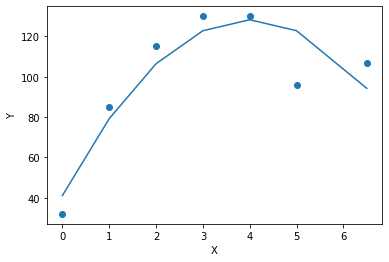

In [ ]:
plt.scatter(x,y)
plt.plot(x, y_p1)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Second regression model

Choose the power $p$ of your model (see step 0 above). You should build the following model:

$$ y_2 = \sum_{i=1}^{p}{\theta_i \cdot x^p} $$

where $y$ is the response variable and $x$ is the explanatory variable (see description of your dataset) and $p$ is the power of the model.

### 4. Train second regression model with OLS method using `stats.models.regression` module (2 points)

`second_model_coeffs` should be an iterable, e.g. a list or a numpy array

In [ ]:
x_1= np.reshape(x,(-1,1))
y_1= np.reshape(y,(-1,1))
polynomial_features= PolynomialFeatures(degree=3)
x_1 = polynomial_features.fit_transform(x_1)
reg = sm.OLS(y_1, x_1).fit()
y_p2 = reg.predict(x_1) 

In [ ]:
second_model_coeffs = reg.params
print(f"Coefficints of the second regression model are '{second_model_coeffs}'")

Coefficints of the second regression model are '[ 29.18179372  78.88253033 -20.0455522    1.4894831 ]'


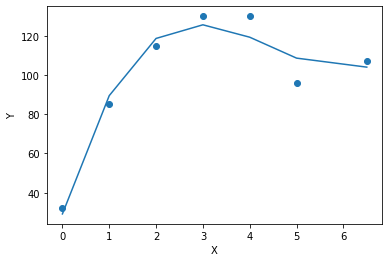

In [ ]:
plt.scatter(x,y)
plt.plot(x, y_p2)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Third regression model

You should build the following model:

$$ y_3 = \theta_1 \cdot x + \theta_0 $$

where $y$ is the response variable and $x$ is the explanatory variable (see description of your dataset).

### 5. Train third regression model with gradient descent (3 points, optional)

You can write your own function for gradient descent or find one on the Internet. It should be possible to change the initial value and learning rate.

`third_model_coeffs` should be an iterable, e.g. a list or a numpy array

In [ ]:
def grad(x,y,epochs = 10**6, learning_rate = 10**-4, teta_1 = 0, teta_0 = 0):
  a = teta_1
  b = teta_0
  for i in range(epochs): 
      y_p = a*x + b
      delta_a = -2 *(x * (y - y_p)).mean()
      delta_b = -2 * (y - y_p).mean()
      a -= learning_rate * delta_a
      b -= learning_rate * delta_b 
  return a,b 
  

In [ ]:
third_model_coeffs = grad(x,y, learning_rate = 10**-4, teta_1 = 0, teta_0 = 0)
y_p3 = third_model_coeffs[0]*x+third_model_coeffs[1]   
print(f"Coefficints of the third regression model are '{third_model_coeffs}'") 

Coefficints of the third regression model are '(21.638595399326277, 9.114299574390751)'


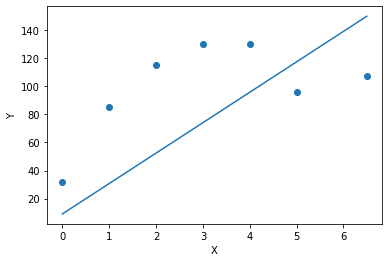

In [ ]:
plt.scatter(x,y)
plt.plot(x, y_p3)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Error estimation

### 6. Calculate MSE and RMSE for all your regression models (2 points)

Error estimations should be floating point numbers

In [ ]:
first_model_mse = mse(y,y_p1)
second_model_mse = mse(y,y_p2)
third_model_mse = mse(y,y_p3)

first_model_rmse = mse(y,y_p1,squared = False)
second_model_rmse = mse(y,y_p2,squared = False)
third_model_rmse = mse(y,y_p3,squared = False)

In [ ]:
print("Среднеквадратическая ошибка каждой модели: \n1)", first_model_mse,'\n2)',second_model_mse,'\n3)',third_model_mse)

Среднеквадратическая ошибка каждой модели: 
1) 160.84776344612905 
2) 49.09683650566347 
3) 1997.2085269042734


## Visualization

### 7. Use `matplotlib` to visualize your results (graded manually, exam)

You should build a single plot with all your models (2 or 3) drawn as curves/lines of different type and color. Additional points if you make the curves look smooth. Draw your dataset as dots on the same plot, do not connect them with lines.

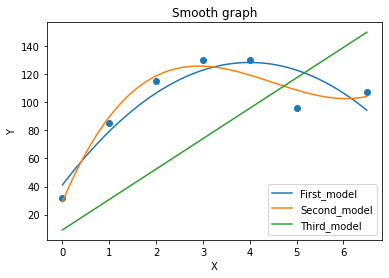

In [ ]:
q = np.linspace(x.min(), x.max(), 500) 

x_for_1 = np.vstack((np.ones(len(q)),q,q**2)).T 
q_1= np.reshape(q,(-1,1))
q_1 = polynomial_features.fit_transform(q_1)

p1 = x_for_1.dot(first_model_coeffs)
p2 = reg.predict(q_1)
p3 = third_model_coeffs[0]*q+third_model_coeffs[1]

plt.scatter(x,y)
plt.plot(q, p1,label = "First_model")
plt.plot(q, p2,label = "Second_model")
plt.plot(q, p3,label = "Third_model")
plt.title("Smooth graph")
plt.xlabel("X")
plt.ylabel("Y")
leg = plt.legend()
plt.show()

### 8. Prepare to discuss your results with the teacher (exam)

Which model is better? Why? What else can you do to make the predictions better?

1) Как мы можем увидеть по mse, лучшей моделью является вторая, так как у нее ошибка меньше всего.

2) В данном случае по распределению данных видно, что зависимость нелинейная, а значит чем выше степень у полинома, тем лучше он будет аппроксимировать точки. Поэтому вторая модель, у которой степень многочлена 3, что больше чем 2 и 1 у остальных моделей, показывает лучшие результаты.

3) Повысить точность регрессии может предварительная обработка данных. Например, если какая-то точка сильно выпадает из общей картины, то возможно она является выбросом и её не следует учитывать. Можно попробовать увеличить степень аппроксимирующего многочлена, чтобы лучше улавливать скрытые закономерности в данных. Но надо следить, чтобы сложность модели не превосходила сложность данных.